# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [256]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [257]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


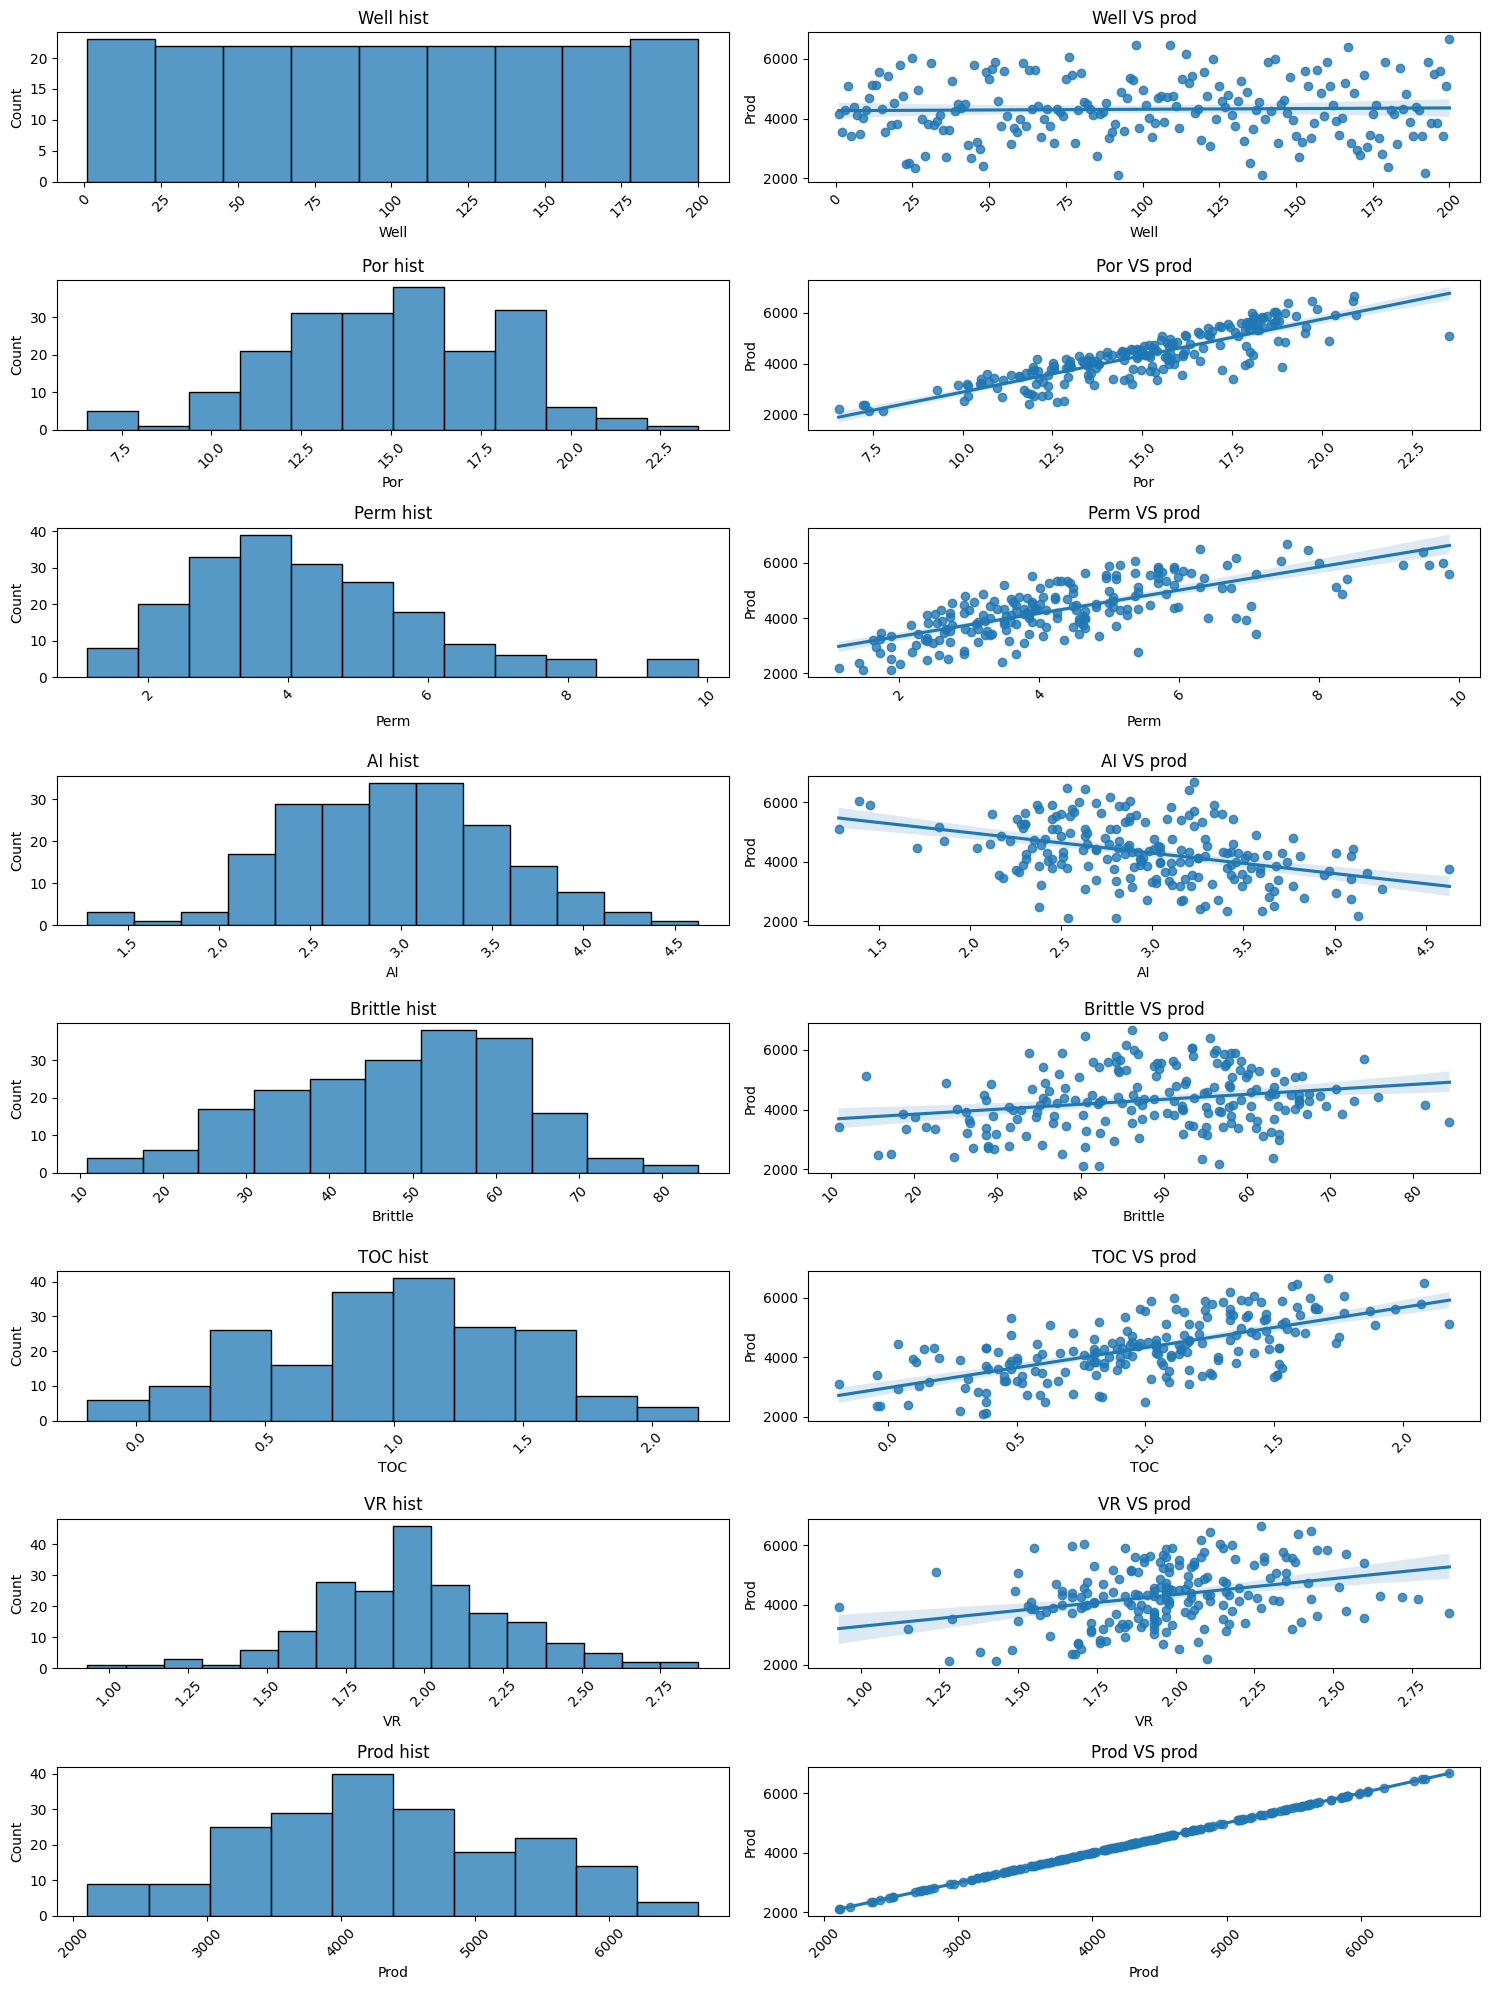

In [258]:
# Ваш код здесь
data.info()
types = data.dtypes
num_features = list(types[(types != 'object')].index)
num_features
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=data, x=feature, y='Prod', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS prod'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

data.describe()
#plt.hist(data.)
#plt.title('Распределение признака year');

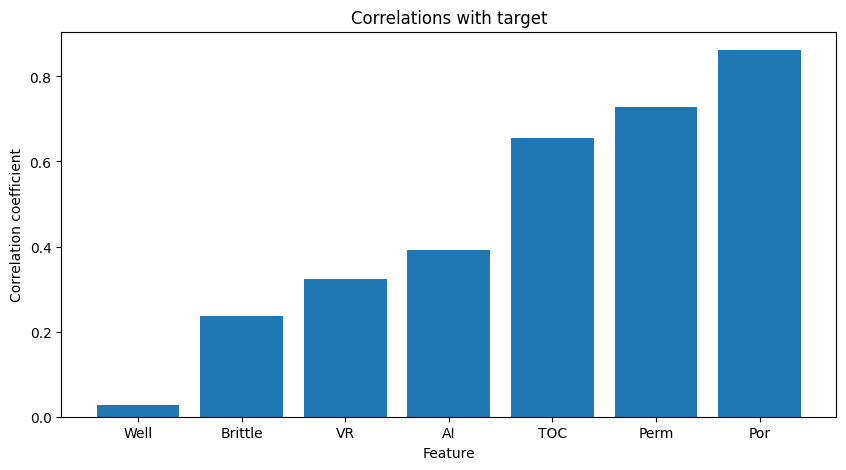

In [259]:
#Вычисляем модуль корреляции
corr_with_target = data.corr()['Prod'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('Prod')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Выводы: самая большая взаимосвязь целевой переменной с признаками Por, Perm, TOC.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [260]:
print(data.shape)

(200, 8)


Ранг корреляционной матрицы:

 8
Определитель корреляционной матрицы: 0.0007299


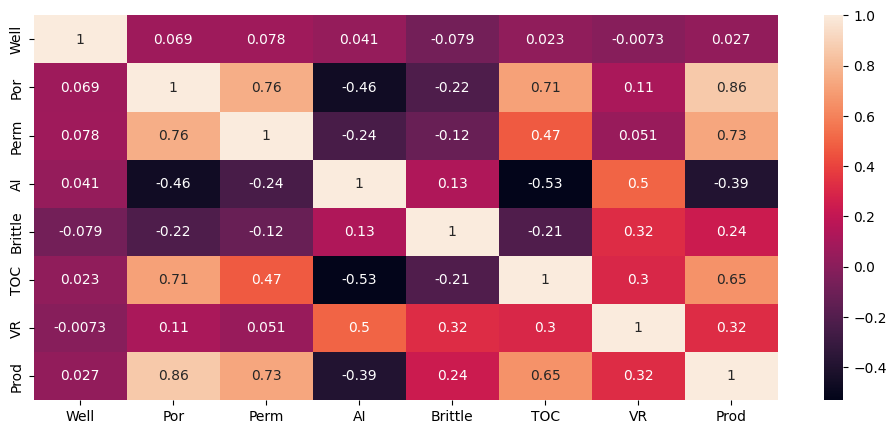

In [261]:
# Ваш код здесь
#рассчеитаем корреляционну матрицу
A_corr=data.corr()

#строим тепловую карту корреляций
fig = plt.figure(figsize=(12, 5))
sns.heatmap(A_corr, annot=True);

#посчитаем ранг матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(A_corr))

#посчитаем определитель матрицы
print('Определитель корреляционной матрицы: {:.7f}'.format(np.linalg.det(A_corr)))

> *Ваши выводы здесь*
1. Сильнее всего коррелируют с целевой переменной Prod (добыча газа в сутки)признаки:
-Por(пористость скважины) 0.86 (сильная прямая взаимосвязь), 
-Perm(проницаемость скважины) 0.73 (сильная прямая взаимосвязь),
Также признаки Perm и Por имеют между собой сильную прямую взаимосвязь 0.76, TOC(общий органический углерод) и Por 0.71.
2. Корреляционная матрица является плохо обусловленной, так как ее определитель близок к нулю (0.0007299)
3. У нас присутствует частичная мультиколлинеарность.
4. Несмотря на то что мультиколлинеарность делает матрицу корреляций более вырожденной, она не оказывает прямого влияния на точность модели сама по себе. Проблема полной вырожденности матрицы, как мы уже обсуждали ранее, в sklearn вполне решается с помощью сингулярного разложения. То есть решение можно получить всегда даже при полной коллинеарности и сильной мультиколлинеарности, несмотря на противоречие с теорией линейной алгебры.


### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [262]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(200), data[['Well', 'Por', 'Perm','AI', 'Brittle', 'TOC', 'VR']]))
y = data[['Prod']]

# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y

#округлим коэффициенты до целых чисел
print(np.round_(w_hat.values))


[[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


> *Ваши выводы здесь*
1. В наших данных есть признак Well(идентификатор скважины), который, согласно модели, можно назвать неинформативным, то есть он не оказывает влияния на целевую переменную.
2. Интерпритация поученных значений:
- если пористостость скважины Por увеличится на 1%, то добыча газа увеличится на 230 млн. куб. футов
- если общий органический углерод TOC увеличится на 1%, то добыча газа упадет на 78 млн. куб. футов
- если проницаемость скважины Perm увеличится на 1%, то добыча газа увеличится на 116 млн. куб. футов 
- если коэффициент отражения витринита VR увеличится на 1%, то добыча газа увеличится на 785 млн. куб. футов
- если коэффициент хрупкости скважины Brittle увеличится на 1%, то добыча газа увеличится на 25 млн. куб. футов


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [263]:
# Ваш код здесь
df=data.loc[data['Well']==106]
new = np.column_stack((np.ones(1), df[['Well', 'Por', 'Perm','AI', 'Brittle', 'TOC', 'VR']]))
y_new = df[['Prod']]

#быстрый способ
print('prediction:', (new@w_hat).values)
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
#print('w_hat:', model.coef_)
prediction = model.predict(A)
print('prediction:', prediction)

from sklearn import metrics

print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, prediction) * 100))
print('R2 score: {:.3f}'.format(metrics.r2_score(y, prediction)))


prediction: [[4723.06405371]]
prediction: [[4622.70495134]
 [3412.28509773]
 [4717.27342158]
 [5045.93273845]
 [3817.59960464]
 [4266.59975955]
 [4203.98238154]
 [3385.02513907]
 [4202.93287979]
 [4567.34247328]
 [4762.32689161]
 [4958.74652566]
 [5376.37329106]
 [5398.87579314]
 [4575.43049238]
 [3536.30419396]
 [5434.55260889]
 [3963.46242028]
 [4803.20009394]
 [3784.53263333]
 [5604.88269189]
 [4542.14215288]
 [2558.04389628]
 [2343.05617327]
 [5718.14877932]
 [2116.77843825]
 [4861.44126248]
 [4169.61525382]
 [2732.36602593]
 [3721.44003237]
 [5653.63615064]
 [3725.47692036]
 [3923.29152933]
 [4038.39782584]
 [3711.64976655]
 [2758.56904237]
 [3495.22598653]
 [5428.21355924]
 [4155.15316364]
 [4674.10333006]
 [4261.05823196]
 [4363.90516919]
 [3096.2697799 ]
 [2680.51174195]
 [5533.21279385]
 [3298.17145429]
 [2901.72364441]
 [2405.622932  ]
 [5222.60246438]
 [5077.32285034]
 [5341.73544002]
 [5941.43289724]
 [4539.79436263]
 [3858.26792027]
 [5432.62982118]
 [3991.74414981]
 [3252

In [264]:
Well=106.00
Por=15.32
Perm=3.71
AI=3.29
Brittle=55.99
TOC=1.35
VR=2.42
Prod=4748.315024

# Сделаем прогноз выработки скважины № 106
new=np.array([1,Well,Por,Perm,AI,Brittle,TOC,VR])
print('pred_106:', (new@w_hat))

# Рассчитаем абсолютную ошибку нашего прогноза от фактических показателей
e = Prod - new@w_hat
print('Абсолютная ошибка:', e)


pred_106: Prod    4723.064054
dtype: float64
Абсолютная ошибка: Prod    25.25097
dtype: float64


In [265]:
#построим прогноз выработки газа для всех скважин из обучающего набора данных
X = np.column_stack((np.ones(200), data[['Well', 'Por', 'Perm','AI', 'Brittle', 'TOC', 'VR']]))
y = data[['Prod']]
y_predict=X@w_hat
print('Prediction:', (y_predict).values)
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict) * 100))


Prediction: [[4622.70495134]
 [3412.28509773]
 [4717.27342158]
 [5045.93273845]
 [3817.59960464]
 [4266.59975955]
 [4203.98238154]
 [3385.02513907]
 [4202.93287979]
 [4567.34247328]
 [4762.32689161]
 [4958.74652566]
 [5376.37329106]
 [5398.87579314]
 [4575.43049238]
 [3536.30419396]
 [5434.55260889]
 [3963.46242028]
 [4803.20009394]
 [3784.53263333]
 [5604.88269189]
 [4542.14215288]
 [2558.04389628]
 [2343.05617327]
 [5718.14877932]
 [2116.77843825]
 [4861.44126248]
 [4169.61525382]
 [2732.36602593]
 [3721.44003237]
 [5653.63615064]
 [3725.47692036]
 [3923.29152933]
 [4038.39782584]
 [3711.64976655]
 [2758.56904237]
 [3495.22598653]
 [5428.21355924]
 [4155.15316364]
 [4674.10333006]
 [4261.05823196]
 [4363.90516919]
 [3096.2697799 ]
 [2680.51174195]
 [5533.21279385]
 [3298.17145429]
 [2901.72364441]
 [2405.622932  ]
 [5222.60246438]
 [5077.32285034]
 [5341.73544002]
 [5941.43289724]
 [4539.79436263]
 [3858.26792027]
 [5432.62982118]
 [3991.74414981]
 [3252.50355726]
 [3781.69338147]
 [

> *Ваши выводы здесь*
1. MAPE у нас составляет 3.628%. То есть на 3.628 процентов в среднем наше предсказание отклоняется от реального значения. 
2. Метрика R2 сотсавляет 0.960, она показывает какую долю информации о зависимости (дисперсии) смогла уловить модель. Удовлетворительным  считается показатель выше 0.5: чем ближе к 1, тем лучше. Значение метрики в нашем случае прекрасное.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [266]:
# Ваш код здесь

> *Ваши выводы здесь*
1. В нашей модели есть фактор TOC (общий органический углерод ), при котором коэффициент в модели линейной регрессии (Wtoc= -78) противоречит соответствующему коэффициенту корреляции (coef=0.65). То есть корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. 
2. Полученное противоречие результатов связано с тем, что наши данные не были стандартизированы.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [267]:
# Ваш код здесь
df=data.copy()
df= df.drop('Perm', axis=1)
df=df.drop('TOC', axis=1) 
df=df.drop('Well', axis=1) 

In [268]:
df.head()

,Por,AI,Brittle,VR,Prod
0,12.08,2.80,81.40,2.31,4165.196191
1,12.38,3.22,46.17,1.88,3561.146205
2,14.02,4.01,72.80,2.72,4284.348574
3,17.67,2.63,39.81,1.88,5098.680869
4,17.52,3.18,10.94,1.90,3406.132832


In [269]:
# составляем матрицу наблюдений и вектор целевой переменной
A_new= np.column_stack((np.ones(200), df[['Por', 'AI', 'Brittle', 'VR']]))
y_new = df[['Prod']]

# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat_new=np.linalg.inv(A_new.T@A_new)@A_new.T@y_new

#округлим коэффициенты до целых чисел
print(np.round_(w_hat_new.values))

y_predict_new=A_new@w_hat_new

#рассчитаем метрики
print('Prediction:', (y_predict_new).values)
print('R2 score: {:.3f}'.format(metrics.r2_score(y_new, y_predict_new)))
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_new, y_predict_new) * 100))


[[-1835.]
 [  293.]
 [ -200.]
 [   28.]
 [  517.]]
Prediction: [[4589.52107225]
 [3397.14399164]
 [4890.39665689]
 [4889.52732317]
 [3947.90778624]
 [4229.90622767]
 [4249.72393291]
 [3371.37211174]
 [4189.69700814]
 [4506.11934873]
 [4732.69328972]
 [4770.2808588 ]
 [5400.06549123]
 [5443.26761475]
 [4394.09353209]
 [3517.90058824]
 [5267.23070275]
 [4010.17126685]
 [4762.89618425]
 [3774.24176357]
 [5548.3979881 ]
 [4647.80840121]
 [2585.76402238]
 [2368.36068081]
 [5713.97197141]
 [1990.15019761]
 [4789.10952823]
 [4020.06126188]
 [2913.1663106 ]
 [3797.30839332]
 [5573.4975885 ]
 [3835.34899987]
 [3904.1576923 ]
 [4133.93418772]
 [3734.07176821]
 [2665.06381221]
 [3606.05790784]
 [5324.50412304]
 [4257.34163193]
 [4697.54584428]
 [4063.19893616]
 [4414.35579957]
 [3013.79313665]
 [2615.06305394]
 [5468.55684394]
 [3319.84302638]
 [2915.77056731]
 [2383.33875541]
 [5373.00889015]
 [5259.1194018 ]
 [5386.87949561]
 [5703.90936342]
 [4643.91872457]
 [3900.95809286]
 [5229.79240286]
 [

> *Ваши выводы здесь*
1.  Интерпритация полученных значений:
- если пористостость скважины Por увеличится на 1%, то добыча газа увеличится на 293 млн. куб. футов. Данное значение лучше, чем предыдущее на 53 млн. куб. футов
- если коэффициент отражения витринита VR увеличится на 1%, то добыча газа увеличится на 517 млн. куб. футов. Данное значениеу хуже, чем предыдущее на 268 млню куб.футов.
- если коэффициент хрупкости скважины Brittle увеличится на 1%, то добыча газа увеличится на 28 млн. куб. футов. Данное значение лучше, чем предыдущее на 3 млн. куб. футов
2. Удалили признаки Perm (сильная корреляция с призком Por, коэффициент корреляции Por с целевой переменной выше), TOC (сильная корреляция с признаком POR, коэффициент корреляции Por с целевой переменной выше), Well (слабая корреляция с целевым признаком). 
3. MAPE у нас теперь составляет 4.044%. То есть на 4.044 3.628 процентов в среднем наше предсказание отклоняется от реального значения. Значение метрики ухудшилось на 0.416%
Метрика R2 сотсавляет 0.945, она показывает какую долю информации о зависимости (дисперсии) смогла уловить модель. Удовлетворительным  считается показатель выше 0.5: чем ближе к 1, тем лучше. Значение метрики немного ухудшилось (на 0.015)
4. Нам удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [270]:
# Ваш код здесь
X_lr = np.column_stack((np.ones(200), df[['Por', 'AI', 'Brittle', 'VR']]))
y_lr = df[['Prod']]

from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(X_lr, y_lr)
coef=model.coef_
print(f'w_hat:{np.round_(coef)}')
prediction = model.predict(X_lr)
print('prediction:', prediction)

from sklearn import metrics

print('R2 score: {:.3f}'.format(metrics.r2_score(y_lr, prediction)))
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_lr, prediction) * 100))

w_hat:[[-1835.   293.  -200.    28.   517.]]
prediction: [[4589.52107225]
 [3397.14399164]
 [4890.39665689]
 [4889.52732317]
 [3947.90778624]
 [4229.90622767]
 [4249.72393291]
 [3371.37211174]
 [4189.69700814]
 [4506.11934873]
 [4732.69328972]
 [4770.2808588 ]
 [5400.06549123]
 [5443.26761475]
 [4394.09353209]
 [3517.90058824]
 [5267.23070275]
 [4010.17126685]
 [4762.89618425]
 [3774.24176357]
 [5548.3979881 ]
 [4647.80840121]
 [2585.76402238]
 [2368.36068081]
 [5713.97197141]
 [1990.15019761]
 [4789.10952823]
 [4020.06126188]
 [2913.1663106 ]
 [3797.30839332]
 [5573.4975885 ]
 [3835.34899987]
 [3904.1576923 ]
 [4133.93418772]
 [3734.07176821]
 [2665.06381221]
 [3606.05790784]
 [5324.50412304]
 [4257.34163193]
 [4697.54584428]
 [4063.19893616]
 [4414.35579957]
 [3013.79313665]
 [2615.06305394]
 [5468.55684394]
 [3319.84302638]
 [2915.77056731]
 [2383.33875541]
 [5373.00889015]
 [5259.1194018 ]
 [5386.87949561]
 [5703.90936342]
 [4643.91872457]
 [3900.95809286]
 [5229.79240286]
 [4024.3

> *Ваши выводы здесь*
Значения коэффициентов и метрик такие же как мы получили ранее. Это говорит о том, что нет особой разницы как проводить вычисления (вручную или через sklearn).

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [271]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [272]:
# Ваш код здесь
data_scaled = df.copy()
col_names = ['Por', 'AI', 'Brittle', 'VR', 'Prod']
x = data_scaled[col_names]
scaler = StandardScaler()
data_scaled[col_names] = scaler.fit_transform(x.values)

data_scaled.describe()

A=data_scaled[['Por', 'AI', 'Brittle', 'VR']]
y=data_scaled['Prod']

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)

A_poly = poly.fit_transform(A)
lr = LinearRegression().fit(A_poly, y)
y_pred = lr.predict(A_poly)

# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly[:, 1:].shape[1])

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_pred)))

from sklearn.model_selection import cross_validate 
# создаём модель линейной регрессии
lr1 = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr1, A_poly, y, scoring='neg_mean_absolute_percentage_error', cv=3, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

Ранг корреляционной матрицы: 33
Количество факторов: 33
MAPE для полинома 3-й степени  64.07%
R2 score: 0.989
MAPE на тренировочных фолдах: 60.36 %
MAPE на валидационных фолдах: 72.21 %


> *Ваши выводы здесь*
1. Метрика R2 улучшидась на 0.044, метрика MAPE очень сильно выросла и составила 64.07%.Это означает, что модель стала хуже описывать зависимость в исходных данных.
2.Мы получили переобучение: на тренировочной выборке  значение метрики MAPE 60.36%, а вот на тестовой — 72.21% . 

In [213]:
display(pd.DataFrame(w_hat).describe())

,Prod
count,8.000000
mean,-64.898529
std,574.227381
min,-1232.308030
25%,-150.101272
50%,12.522535
75%,144.724040
max,785.259815


### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [231]:
data_scaled1 = df.copy()
col_names = ['Por', 'AI', 'Brittle', 'VR', 'Prod']
x = data_scaled1[col_names]
scaler1 = StandardScaler()
data_scaled1[col_names] = scaler1.fit_transform(x.values)

data_scaled.describe()

X=data_scaled[['Por', 'AI', 'Brittle', 'VR']]
y=data_scaled['Prod']

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly.fit_transform(X)

In [234]:
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.linear_model import Lasso


# Зададим пространство поиска гиперпараметров
space_lr={
       'alpha': hp.uniform('alpha', 0.01, 100)
       }


# Зафиксируем random_state
random_state = 42
def hyperopt_lr(space_lr):
    
    # Используем эту комбинацию для построения модели
    model_lasso = Lasso(alpha=space_lr['alpha'], random_state=random_state)
    
    # Обучаем модель
    model_lasso.fit(X_poly, y)
    mape = mean_absolute_percentage_error(y, model_lasso.predict(X_poly))


    # Метрику необходимо минимизировать, поэтому ставим знак минус
    return {'loss': mape, 'status': STATUS_OK }

# начинаем подбор гиперпараметров
trials = Trials() # используется для логирования результатов

best = fmin(
          hyperopt_lr, # наша функция 
          space=space_lr, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate = np.random.default_rng(random_state) # фиксируем для повторяемости результата
          )
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 50/50 [00:00<00:00, 185.18trial/s, best loss: 0.9999999999999997]
Наилучшие значения гиперпараметров {'alpha': 81.36740420995237}


In [237]:
# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=81.36740420995237, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))


MAPE на тренировочных фолдах: 104.10 %
MAPE на валидационных фолдах: 107.58 %


> *Ваши выводы здесь*
Метрика MAPE  на тренировочных флодах сосотавила 104.10%, а на валидационных - 107.58%. Метрика очень сильно выросла по псравнению с предыдущей моделью почти в 2 раза.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [238]:
# Зададим пространство поиска гиперпараметров
space_lr={
       'alpha': hp.uniform('alpha', 0.01, 100)
       }


# Зафиксируем random_state
random_state = 42
def hyperopt_lr(space_lr):
    
    # Используем эту комбинацию для построения модели
    model_ridge = Ridge(alpha=space_lr['alpha'], random_state=random_state)
    
    # Обучаем модель
    model_ridge.fit(X_poly, y)
    mape = mean_absolute_percentage_error(y, model_ridge.predict(X_poly))


    # Метрику необходимо минимизировать, поэтому ставим знак минус
    return {'loss': mape, 'status': STATUS_OK }

# начинаем подбор гиперпараметров
trials = Trials() # используется для логирования результатов

best = fmin(
          hyperopt_lr, # наша функция 
          space=space_lr, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate = np.random.default_rng(random_state) # фиксируем для повторяемости результата
          )
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 50/50 [00:00<00:00, 155.75trial/s, best loss: 0.63929638904932]  
Наилучшие значения гиперпараметров {'alpha': 0.24517016496574062}


In [239]:
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Lasso(alpha=0.24517016496574062, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 114.21 %
MAPE на валидационных фолдах: 117.08 %


> *Ваши выводы здесь*
Метрика MAPE  на тренировочных флодах сосотавила 114.21%, а на валидационных - 117.08%. Метрика опять выросла по сравнению с предыдущей моделью.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [242]:
# Ваш код здесь
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK


# Зададим пространство поиска гиперпараметров
space_lr={
       'alpha': hp.uniform('alpha', 0.01, 100),
       'l1_ratio': hp.uniform('l1_ratio', 0.01, 1)
       }


# Зафиксируем random_state
random_state = 42
def hyperopt_lr(space_lr):
  

    # Используем эту комбинацию для построения модели
    model_lr = ElasticNet(alpha=space_lr['alpha'], l1_ratio=space_lr['l1_ratio'], random_state=random_state)


    # Обучаем модель
    model_lr.fit(X_poly, y)
    mape = mean_absolute_percentage_error(y, model_lr.predict(X_poly))


    # Метрику необходимо минимизировать, поэтому ставим знак минус
    return {'loss': mape, 'status': STATUS_OK }

# начинаем подбор гиперпараметров
trials = Trials() # используется для логирования результатов

best = fmin(
          hyperopt_lr, # наша функция 
          space=space_lr, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate = np.random.default_rng(random_state) # фиксируем для повторяемости результата
          )
print("Наилучшие значения гиперпараметров {}".format(best))

 34%|███▍      | 17/50 [00:00<00:00, 169.02trial/s, best loss: 0.9654527146049141]

100%|██████████| 50/50 [00:00<00:00, 135.28trial/s, best loss: 0.9498882848038095]
Наилучшие значения гиперпараметров {'alpha': 37.00039837219491, 'l1_ratio': 0.01670714098294257}


In [243]:
# создаём модель линейной регрессии c регуляризацией ElasticNet
elasticnet = ElasticNet(alpha=37.00039837219491, l1_ratio=0.01670714098294257, fit_intercept=False)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(elasticnet, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 94.93 %
MAPE на валидационных фолдах: 96.54 %


> *Ваши выводы здесь*
Метрика MAPE  на тренировочных флодах сосотавила 94.93%, а на валидационных - 96.54%. Метрика снизилась по сравнению с двумя предыдущими моделями.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

> *Ваши выводы здесь*
Наилучшие резудьтаты метрики MAPE были получены при использовании модели LinearRegression, наихудшие - модели Ridge.

In [244]:
df=pd.DataFrame({'Model': ['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet'], 
                 'Hiper_parametres': ['No', 'alpha', 'alpha', 'alpha, l1_ratio'], 
                 'PolynomialFeatures': ['Yes', 'Yes', 'Yes', 'Yes'], 
                 'MAPE_train': [60.36, 104.10, 114.21, 94.93], 
                 'MAPE_valid': [72.21, 107.58, 117.08, 96.54]})
df

,Model,Hiper_parametres,PolynomialFeatures,MAPE_train,MAPE_valid
0,LinearRegression,No,Yes,60.36,72.21
1,Lasso,alpha,Yes,104.10,107.58
2,Ridge,alpha,Yes,114.21,117.08
3,Elasticnet,"alpha, l1_ratio",Yes,94.93,96.54
